PyVis is used to generate the network graphs
[PyVis](https://pyvis.readthedocs.io/en/latest/tutorial.html)

PlotLy Group Function is used to generate the distribution graphs
[Plotly](https://plotly.com/python/group-by/)


Some Acronyms:
IG: Interactive Graph
SP: Scatter Plot

In [59]:
!pip install pyvis==0.3.1
!pip install plotly
from pyvis.network import Network
import pandas as pd
from pandas import DataFrame
import plotly.express as px
import textwrap

def extract_numbers(input_string):
    numbers_only = ''.join(char for char in input_string if char.isdigit())
    result_integer = int(numbers_only)
    return result_integer

def wrap_text(text, width=50):
    wrapper = textwrap.TextWrapper(width=width, break_long_words=False)
    return '\n'.join(wrapper.wrap(text))

def wrap_text_withBR(text, width=40):
    wrapper = textwrap.TextWrapper(width=width, break_long_words=False)
    return '<br>'.join(wrapper.wrap(text))

# def CenteredAlign(text, width=50):
#     wrapper = textwrap.TextWrapper(width=width, break_long_words=False)
#     return '<br>'.join(wrapper.wrap(text))

In [60]:
def processing(df):
  for column in df.columns:
    df[column] = df[column].str.lstrip().str.rstrip()
    return df

In [61]:
MainSheet = pd.read_excel("dt.xlsx", sheet_name='main', skiprows=0)
FeatureDescriptionSheet = pd.read_excel("dt.xlsx", sheet_name='FeatureDescription', skiprows=0)
ClassDescriptionSheet = pd.read_excel("dt.xlsx", sheet_name='ClassDescription', skiprows=0)
EntityDescriptionSheet = pd.read_excel("dt.xlsx", sheet_name='EntityDescription', skiprows=0)

# MainSheet = MainSheet.drop(columns=['Article Title', 'Link', 'SL'])

In [62]:
MainSheet = processing(MainSheet)
FeatureDescriptionSheet = processing(FeatureDescriptionSheet)
ClassDescriptionSheet = processing(ClassDescriptionSheet)
EntityDescriptionSheet = processing(EntityDescriptionSheet)
# Display the modified DataFrame

In [63]:
MainSheet['ReACT_title'] = MainSheet['ReACT_title'].apply(wrap_text)

ReAct_Dict = dict(zip(MainSheet['ReACT_number'], MainSheet['ReACT_title']))
FeatureDescription_Dict = dict(zip(FeatureDescriptionSheet['FeatureName'], FeatureDescriptionSheet['DescriptionOfTheFeature']))
ClassDescription_Dict = dict(zip(ClassDescriptionSheet['Class'], ClassDescriptionSheet['ClassDescription']))
EntityDescription_Dict = dict(zip(EntityDescriptionSheet['Entity'], EntityDescriptionSheet['EntityDescription']))
MainSheet.head()

,ReACT_number,ReACT_title,Class,Entity_responsible,Features,Quatative/Qualatitative,References,Articles
0,ReACT-1,Ensure a team of friendly and supportive\ndeve...,"Individual, Group","Project Maintainers, Project Leaders",num_act_dev,NaN,No. of reference: 3\n,"1. G. Avelino, E. Constantinou, M. T. Valente ..."
1,ReACT-10,Offer job support to the newcomer.,Foundation,"Project Managers, Owners","num_act_dev, c_long_tail",NaN,No. of reference: 1,"1. G. Avelino, E. Constantinou, M. T. Valente ..."
2,ReACT-11,Keep the project small and simple.,"Project, Ecosystem",Core Developers,num_act_dev,NaN,No. of reference: 3\n,"1. G. Avelino, E. Constantinou, M. T. Valente ..."
3,ReACT-11,Keep the project small and simple.,"Project, Ecosystem",Core Developers,num_commits,NaN,No. of reference: 1,"1. Carsten Kolassa, Dirk Riehle, and Michel A...."
4,ReACT-11,Keep the project small and simple.,"Project, Ecosystem",Core Developers,"top_c_fract, c_nodes",NaN,No. of reference: 1,"1. Jailton Coelho, Marco Tulio Valente, Lucian..."


In [64]:
ReActAndTitle = MainSheet[['ReACT_number', 'ReACT_title']]

#Plotting ReAct and Class - Network Diagram

In [44]:
ReActAndClass = MainSheet[['ReACT_number', 'Class']]

b = DataFrame(ReActAndClass.Class.str.split(',').tolist(), index=ReActAndClass.ReACT_number).stack()
b = b.reset_index()[[0, 'ReACT_number']]
b.columns = ['Class', 'ReACT_number'] # renaming var1
ReActAndClass = b
ReActAndClass = processing(ReActAndClass)

In [45]:
ReActTitleClass = pd.merge(ReActAndTitle, ReActAndClass, on='ReACT_number', how='outer')
ReActTitleClass['ClassDescription'] = None

ReActClassDescription = ReActTitleClass
ReActClassDescription
for i in range(0,len(ReActClassDescription)):
  # print(ReActClassDescription.Class[i].lstrip().rstrip())
  # print(i, ClassDescription_Dict[ReActClassDescription.Class[i].lstrip().rstrip()])
  ReActClassDescription.ClassDescription[i] = ClassDescription_Dict[ReActClassDescription.Class[i].lstrip().rstrip()]
ReAct_Title_Class_ClassDescription = ReActClassDescription


In [46]:
ReACT_number = ReAct_Title_Class_ClassDescription['ReACT_number'].values
ReACT_Title = ReAct_Title_Class_ClassDescription['ReACT_title'].values
ReAct_Title_Class_ClassDescription['ReACT_title'] = ReAct_Title_Class_ClassDescription['ReACT_title'].apply(wrap_text)

Class = ReAct_Title_Class_ClassDescription['Class'].values
ReAct_Title_Class_ClassDescription['ClassDescription'] =  ReAct_Title_Class_ClassDescription['ClassDescription'].apply(wrap_text)
ClassDescription = ReAct_Title_Class_ClassDescription['ClassDescription'].values

net = Network(directed =True)
for i in range(0,len(ReACT_number)):
  # print(actionable[i])
  net.add_node(ReACT_number[i], label=ReACT_number[i], title=ReACT_Title[i])
  net.add_node(Class[i], label=Class[i], title=ClassDescription[i], color = "#5DBB63",shape='box')
  net.add_edge(ReACT_number[i], Class[i], color = "#016064")

# net.show_buttons(filter_=['physics'])
net.show('IG_Class.html')

In [47]:
ReAct_Title_Class_ClassDescription['ReACT_title'][0]

'Ensure a team of friendly and supportive\ndevelopers.'

##BarPlot

In [48]:
unique_counts = ReAct_Title_Class_ClassDescription['Class'].value_counts().reset_index()

# Rename the columns for clarity
unique_counts.columns = ['Class of ReACTs', 'Count of ReACTs']

# Define an array of colors
darker_shades = ['darkred', 'lightblue', 'lightgreen', '#FFABAB', '#91a8a8', '#95ab8a', '#00a86b', '#8E44AD', '#2E4053', '#D35400', '#a37b65', '#548569', '#474466', '#FDEBD0', '#F9EBB2', '#EAECEE', '#8B5A80']

fig = px.bar(unique_counts, x='Class of ReACTs', y='Count of ReACTs', color='Class of ReACTs', color_discrete_sequence=darker_shades)

# Save the plot as an HTML file
fig.write_html('BarPlot_Class.html')
fig.show()

In [49]:
ReAct_Title_Class_ClassDescription

,ReACT_number,ReACT_title,Class,ClassDescription
0,ReACT-1,Ensure a team of friendly and supportive\ndeve...,Individual,The Individual class emphasizes the role of\ni...
1,ReACT-1,Ensure a team of friendly and supportive\ndeve...,Group,Activities that can be performed by working gr...
2,ReACT-10,Offer job support to the newcomer.,Foundation,Actionable in this class related to financial ...
3,ReACT-11,Keep the project small and simple.,Project,The Project class focuses on the overall\nmana...
4,ReACT-11,Keep the project small and simple.,Ecosystem,Actionable in this class related to the projec...
...,...,...,...,...
148,ReACT-88,Assign an experienced team member to coach and...,Pairwise,"The pair programming or code reviews, where tw..."
149,ReACT-89,Grant the newcomer freedom: Encourage and allo...,Individual,The Individual class emphasizes the role of\ni...
150,ReACT-89,Grant the newcomer freedom: Encourage and allo...,Group,Activities that can be performed by working gr...
151,ReACT-9,Grant newcomer access to the main repository.,Code,The Code class is centered around the quality ...


In [50]:
import plotly.graph_objects as go
import plotly.io as pio

subject = ReAct_Title_Class_ClassDescription['Class']
score = ReAct_Title_Class_ClassDescription['ReACT_number']

TextToShow = "<b>"+ReAct_Title_Class_ClassDescription['ReACT_number'] + " Belongs to </b>"
TextToShow += "<b>"+ReAct_Title_Class_ClassDescription['Class'] +"</b> Class"+ "<br>"
TextToShow += "<b>"+ReAct_Title_Class_ClassDescription['ReACT_number']+"</b>: "
TextToShow += ReAct_Title_Class_ClassDescription['ReACT_title'].apply(wrap_text_withBR)
TextToShow += "<br><b>" +ReAct_Title_Class_ClassDescription['Class'] +": </b>"
TextToShow += ReAct_Title_Class_ClassDescription['ClassDescription'].apply(wrap_text_withBR)


data = [dict(
  type = 'scatter',
  x = subject,
  y = score,
  mode = 'markers',
  text = TextToShow,  # Set the 'text' property to the Y-axis values
  transforms = [dict(
    type = 'groupby',
    groups = subject
  )],
   marker=dict(
        symbol='square',  # Set the shape of the marker (e.g., 'circle', 'square', 'diamond', etc.)
        size=10  # Set the size of the circles (adjust as needed)

    )
)]

layout = dict(xaxis=dict(title='Features'),
              yaxis=dict(title='ReACT Number'),
              height=1200,
              width=800)

fig_dict = dict(data=data, layout=layout)
pio.show(fig_dict, validate=False)
pio.write_html(fig_dict, file='SP_Class.html', auto_open=True, validate=False)

#Plotting ReAct and Entity - Network Diagram

In [51]:
ReActAndEntity = MainSheet[['ReACT_number', 'Entity_responsible']]

b = DataFrame(ReActAndEntity.Entity_responsible.str.split(',').tolist(), index=ReActAndEntity.ReACT_number).stack()
b = b.reset_index()[[0, 'ReACT_number']]
b.columns = ['Entity', 'ReACT_number'] # renaming var1
ReActAndEntity = b
ReActAndEntity = processing(ReActAndEntity) # performing lstrip rstrip after the separation
# ReActAndEntity.Entity.value_counts()

###Unique values in the Entity Column
(You neeed description for each item in the EntityDescription Sheet)
I wrote this to determine the unique values available in the Entity Column. So that, later, I can define each of them in the EntityDescription sheet

In [52]:
unique_values = set(ReActAndEntity.Entity)

# Convert the unique values back to a list if needed
unique_values_list = list(unique_values)

print(unique_values_list)
for i in range(0,len(unique_values_list)):
  print(unique_values_list[i].lstrip().rstrip())

['Technical Leads', 'Quality Assurance Team', 'Project Leaders', 'Mentors', 'Contributors', 'Design Team', 'Project Maintainers', 'Code Reviewers', 'Collaboration Coordinators', 'Owners', 'Sponsors', 'Developers', 'Core Developers', 'Documentation Team', 'Project Managers', 'Architects', 'Community Managers', 'Community Moderators']
Technical Leads
Quality Assurance Team
Project Leaders
Mentors
Contributors
Design Team
Project Maintainers
Code Reviewers
Collaboration Coordinators
Owners
Sponsors
Developers
Core Developers
Documentation Team
Project Managers
Architects
Community Managers
Community Moderators


In [53]:
ReActTitleEntity = pd.merge(ReActAndTitle, ReActAndEntity, on='ReACT_number', how='outer')
ReActTitleEntity['EntityDescription'] = None

ReActEntityDescription = ReActTitleEntity

for i in range(0,len(ReActEntityDescription)):
  ReActEntityDescription.EntityDescription[i] = EntityDescription_Dict[ReActEntityDescription.Entity[i].lstrip().rstrip()]
ReAct_Title_Entity_EntityDescription = ReActEntityDescription
ReAct_Title_Entity_EntityDescription

,ReACT_number,ReACT_title,Entity,EntityDescription
0,ReACT-1,Ensure a team of friendly and supportive\ndeve...,Project Maintainers,Project maintainers in open-source software de...
1,ReACT-1,Ensure a team of friendly and supportive\ndeve...,Project Leaders,Project leaders in open-source software develo...
2,ReACT-10,Offer job support to the newcomer.,Project Managers,"In open-source software development, project m..."
3,ReACT-10,Offer job support to the newcomer.,Owners,"In open-source software development, owners ty..."
4,ReACT-11,Keep the project small and simple.,Core Developers,Core developers in open-source software develo...
...,...,...,...,...
201,ReACT-87,Follow up newcomers on both success and failure,Mentors,Mentors in open-source software development ar...
202,ReACT-88,Assign an experienced team member to coach and...,Mentors,Mentors in open-source software development ar...
203,ReACT-89,Grant the newcomer freedom: Encourage and allo...,Community Moderators,Community moderators in open-source software d...
204,ReACT-9,Grant newcomer access to the main repository.,Project Leaders,Project leaders in open-source software develo...


In [54]:
df = ReAct_Title_Entity_EntityDescription
ReACT_number = df['ReACT_number'].values

ReACT_Title = df['ReACT_title'].values

Entity = df['Entity'].values
df['EntityDescription'] = df['EntityDescription'].apply(wrap_text)
EntityDescription = df['EntityDescription'].values


net = Network(directed =True)
for i in range(0,len(ReACT_number)):
  # print(actionable[i])
  net.add_node(ReACT_number[i], label=ReACT_number[i], title=ReACT_Title[i])
  net.add_node(Entity[i], label=Entity[i], title=EntityDescription[i], color = "#98BF64",shape='box')
  net.add_edge(Entity[i], ReACT_number[i], color = "#32612D")

# net.show_buttons(filter_=['physics'])
net.show('IG_Entity.html')

In [55]:
unique_counts = ReAct_Title_Entity_EntityDescription['Entity'].value_counts().reset_index()

# Rename the columns for clarity
unique_counts.columns = ['Entity Responsible for Performing ReACTs', 'Count of ReACTs']

# Define an array of colors
darker_shades = ['darkred', 'lightblue', 'lightgreen', '#FFABAB', '#91a8a8',
                 '#95ab8a', '#00a86b', '#8E44AD', '#2E4053', '#D35400', '#a37b65',
                 '#6C5B7B', '#C0C999', '#7D8CC4', '#FFA07A', '#88D8B0',
    '#826c7F', '#D8D8D8', '#5F758E', '#E2B464', '#649E7D',
    '#CAAE77', '#7A9E9F', '#FAE5D3', '#BAC9FF', '#E47878',
    '#D2F2D2', '#7C83FD', '#F5A623', '#A77B7B', '#D8D8D8']


# Create an interactive bar plot using Plotly Express
fig = px.bar(unique_counts, x='Count of ReACTs', y='Entity Responsible for Performing ReACTs', color='Entity Responsible for Performing ReACTs', color_discrete_sequence=darker_shades, orientation='h')

# Save the plot as an HTML file
fig.write_html('BarPlot_Entity.html')
fig.show()

In [56]:
import plotly.graph_objects as go
import plotly.io as pio

subject = ReAct_Title_Entity_EntityDescription['Entity']
score = ReAct_Title_Entity_EntityDescription['ReACT_number']

TextToShow = "<b>"+ReAct_Title_Entity_EntityDescription['Entity'] + " are Responsible for Performing </b>"
TextToShow += "<b>"+ReAct_Title_Entity_EntityDescription['ReACT_number'] +"</b>"+ "<br>"
TextToShow += "<b>"+ReAct_Title_Entity_EntityDescription['ReACT_number']+"</b>: "
TextToShow += ReAct_Title_Entity_EntityDescription['ReACT_title'].apply(wrap_text_withBR)
TextToShow += "<br><b>" +ReAct_Title_Entity_EntityDescription['Entity'] +": </b>"
TextToShow += ReAct_Title_Entity_EntityDescription['EntityDescription'].apply(wrap_text_withBR)


data = [dict(
  type = 'scatter',
  x = subject,
  y = score,
  mode = 'markers',
  text = TextToShow,  # Set the 'text' property to the Y-axis values
  transforms = [dict(
    type = 'groupby',
    groups = subject
  )],
   marker=dict(
        symbol='square',  # Set the shape of the marker (e.g., 'circle', 'square', 'diamond', etc.)
        size=10  # Set the size of the circles (adjust as needed)

    )
)]

layout = dict(xaxis=dict(title='Features'),
              yaxis=dict(title='ReACT Number'),
              height=1200,
              width=1100)

fig_dict = dict(data=data, layout=layout)
pio.show(fig_dict, validate=False)
pio.write_html(fig_dict, file='SP_Entity.html', auto_open=True, validate=False)

#Plotting ReAct and Features - Network Diagram

In [73]:
ReActAndFeature = MainSheet[['ReACT_number', 'Features']]

b = DataFrame(ReActAndFeature.Features.str.split(',').tolist(), index=ReActAndFeature.ReACT_number).stack()
b = b.reset_index()[[0, 'ReACT_number']]
b.columns = ['Features', 'ReACT_number'] # renaming var1
ReActAndFeature  = b
ReActAndFeature = processing(ReActAndFeature)
ReActAndFeature

,Features,ReACT_number
0,num_act_dev,ReACT-1
1,num_act_dev,ReACT-10
2,c_long_tail,ReACT-10
3,num_act_dev,ReACT-11
4,num_commits,ReACT-11
...,...,...
221,c_long_tail,ReACT-9
222,c_nodes,ReACT-90
223,c_edges,ReACT-90
224,c_long_tail,ReACT-90


In [74]:
ReActTitleFeature = pd.merge(ReActAndTitle, ReActAndFeature, on='ReACT_number', how='outer')
ReActTitleFeature['FeatureDescription'] = None
ReActAndReference = MainSheet[['ReACT_number', 'References', 'Articles']]

ReActFeatureDescription = ReActTitleFeature


for i in range(0,len(ReActFeatureDescription)):
 ReActFeatureDescription.FeatureDescription[i] = FeatureDescription_Dict[ReActFeatureDescription.Features[i].lstrip().rstrip()]
ReAct_Title_Feature_FeatureDescription = ReActFeatureDescription
ReAct_Title_Feature_FeatureDescription_Reference = pd.merge(ReAct_Title_Feature_FeatureDescription, ReActAndReference, on='ReACT_number', how='outer')
ReAct_Title_Feature_FeatureDescription_Reference

,ReACT_number,ReACT_title,Features,FeatureDescription,References,Articles
0,ReACT-1,Ensure a team of friendly and supportive\ndeve...,num_act_dev,The number of Active Developers is the count o...,No. of reference: 3\n,"1. G. Avelino, E. Constantinou, M. T. Valente ..."
1,ReACT-10,Offer job support to the newcomer.,num_act_dev,The number of Active Developers is the count o...,No. of reference: 1,"1. G. Avelino, E. Constantinou, M. T. Valente ..."
2,ReACT-10,Offer job support to the newcomer.,c_long_tail,The degree of the 75𝑡ℎ percentile of nodes in ...,No. of reference: 1,"1. G. Avelino, E. Constantinou, M. T. Valente ..."
3,ReACT-11,Keep the project small and simple.,num_act_dev,The number of Active Developers is the count o...,No. of reference: 3\n,"1. G. Avelino, E. Constantinou, M. T. Valente ..."
4,ReACT-11,Keep the project small and simple.,num_act_dev,The number of Active Developers is the count o...,No. of reference: 1,"1. Carsten Kolassa, Dirk Riehle, and Michel A...."
...,...,...,...,...,...,...
355,ReACT-9,Grant newcomer access to the main repository.,c_long_tail,The degree of the 75𝑡ℎ percentile of nodes in ...,No. of reference: 1,"1. G. Avelino, E. Constantinou, M. T. Valente ..."
356,ReACT-90,Establish a personalized integration plan: Out...,c_nodes,The number of active nodes in the technical ne...,No. of reference: 1,"1. G. Matturro, K. Barrella and P. Benitez, ""D..."
357,ReACT-90,Establish a personalized integration plan: Out...,c_edges,The number of active edges in the technical ne...,No. of reference: 1,"1. G. Matturro, K. Barrella and P. Benitez, ""D..."
358,ReACT-90,Establish a personalized integration plan: Out...,c_long_tail,The degree of the 75𝑡ℎ percentile of nodes in ...,No. of reference: 1,"1. G. Matturro, K. Barrella and P. Benitez, ""D..."


In [82]:
df = ReAct_Title_Feature_FeatureDescription_Reference
ReACT_number = df['ReACT_number'].values
ReACT_Title = df['ReACT_title'].values
Feature = df['Features'].values
df['FeatureDescription'] = df['FeatureDescription'].apply(wrap_text)
FeatureDescription = df['FeatureDescription'].values

Edges = ReAct_Title_Feature_FeatureDescription_Reference['References'].values+'\n Reference(s) \n'+ReAct_Title_Feature_FeatureDescription_Reference['Articles'].apply(wrap_text)



net = Network(directed =True)
for i in range(0,len(ReACT_number)):
 # print(actionable[i])
 net.add_node(ReACT_number[i], label=ReACT_number[i], title=ReACT_Title[i])
 net.add_node(Feature[i], label=Feature[i], title=FeatureDescription[i], color = "#E07772",shape='box')
 net.add_edge(ReACT_number[i], Feature[i], weight=extract_numbers(Edges[i]), title=Edges[i], color = "#898980")

#  net.add_edge(ReACT_number[i], Feature[i], weight=extract_numbers(Edges[i]), title=Edges[i], color = "#898980")

# net.show_buttons(filter_=['physics'])
net.show('IG_Feature.html')

In [83]:
ReAct_Title_Feature_FeatureDescription_Reference['Features'].value_counts()

num_act_dev       74
c_nodes           61
top_c_fract       42
num_commits       40
c_edges           28
c_long_tail       23
c_mean_degree     17
top_e_fract       15
c_c_coef          12
e_edges           12
num_files          8
e_nodes            6
e_mean_degree      6
e_long_tail        6
e_c_coef           5
e_interruption     3
num_emails         2
Name: Features, dtype: int64

In [84]:
unique_counts = ReAct_Title_Feature_FeatureDescription_Reference['Features'].value_counts().reset_index()

# Rename the columns for clarity
unique_counts.columns = ['Feature Name', 'Count']

# Define an array of colors
darker_shades = ['darkred', 'lightblue', 'lightgreen', '#FFABAB', '#91a8a8',
                 '#95ab8a', '#00a86b', '#8E44AD', '#2E4053', '#D35400', '#a37b65',
                 '#6C5B7B', '#C0C999', '#7D8CC4', '#FFA07A', '#88D8B0',
    '#826c7F', '#D8D8D8', '#5F758E', '#E2B464', '#649E7D',
    '#CAAE77', '#7A9E9F', '#FAE5D3', '#BAC9FF', '#E47878',
    '#D2F2D2', '#7C83FD', '#F5A623', '#A77B7B', '#D8D8D8']


# Create an interactive bar plot using Plotly Express
fig = px.pie(unique_counts, names='Feature Name', values='Count', color='Feature Name', color_discrete_sequence=darker_shades)

# Save the plot as an HTML file
fig.write_html('PiePlot_Feature.html')
fig.show()

In [70]:
ReAct_Title_Feature_FeatureDescription_Reference

,ReACT_number,ReACT_title,Features,FeatureDescription,References
0,ReACT-1,Ensure a team of friendly and supportive\ndeve...,num_act_dev,The number of Active Developers is the count o...,No. of reference: 3\n
1,ReACT-10,Offer job support to the newcomer.,num_act_dev,The number of Active Developers is the count o...,No. of reference: 1
2,ReACT-10,Offer job support to the newcomer.,c_long_tail,The degree of the 75𝑡ℎ percentile of nodes in ...,No. of reference: 1
3,ReACT-11,Keep the project small and simple.,num_act_dev,The number of Active Developers is the count o...,No. of reference: 3\n
4,ReACT-11,Keep the project small and simple.,num_act_dev,The number of Active Developers is the count o...,No. of reference: 1
...,...,...,...,...,...
355,ReACT-9,Grant newcomer access to the main repository.,c_long_tail,The degree of the 75𝑡ℎ percentile of nodes in ...,No. of reference: 1
356,ReACT-90,Establish a personalized integration plan: Out...,c_nodes,The number of active nodes in the technical\nn...,No. of reference: 1
357,ReACT-90,Establish a personalized integration plan: Out...,c_edges,The number of active edges in the technical\nn...,No. of reference: 1
358,ReACT-90,Establish a personalized integration plan: Out...,c_long_tail,The degree of the 75𝑡ℎ percentile of nodes in ...,No. of reference: 1


In [85]:
import plotly.graph_objects as go
import plotly.io as pio



subject = ReAct_Title_Feature_FeatureDescription_Reference['Features']
score = ReAct_Title_Feature_FeatureDescription_Reference['ReACT_number']


TextToShow = ReAct_Title_Feature_FeatureDescription_Reference['ReACT_number'] + " Positively Impacts "
TextToShow += ReAct_Title_Feature_FeatureDescription_Reference['Features'] + "<br>"
TextToShow +=  "<b>"+ReAct_Title_Feature_FeatureDescription_Reference['ReACT_number']+"</b>: "
TextToShow += ReAct_Title_Feature_FeatureDescription_Reference['ReACT_title'].apply(wrap_text_withBR)
TextToShow += "<br><b>" +ReAct_Title_Feature_FeatureDescription_Reference['Features'] +": </b>"
TextToShow += ReAct_Title_Feature_FeatureDescription_Reference['FeatureDescription'].apply(wrap_text_withBR)

data = [dict(
  type = 'scatter',
  x = subject,
  y = score,
  mode = 'markers',
  text = TextToShow,
  transforms = [dict(
    type = 'groupby',
    groups = subject
  )],
   marker=dict(
        symbol='square',  # Set the shape of the marker (e.g., 'circle', 'square', 'diamond', etc.)
        size=10  # Set the size of the circles (adjust as needed)

    )
)]

layout = dict(xaxis=dict(title='Features'),
              yaxis=dict(title='ReACT Number'),
              height=1200,
              width=800)

fig_dict = dict(data=data, layout=layout)
pio.show(fig_dict, validate=False)
pio.write_html(fig_dict, file='SP_Feature.html', auto_open=True, validate=False)


#WordClouds

In [ ]:
!pip install wordcloud matplotlib
import pandas as pd
import re

### Keyword Wordcloud -  ReACT Driven

### Wordcloud generating from the keywords of the article, from which ReACT could be driven

In [ ]:
df = pd.read_excel("article.xlsx")
df['Keyword'] = df['Keyword'].str.lower()
df['Article'] = df['Article'].str.lower()
df = df[df['ReACTs'] != 'No ReACT could be derived from the article']
df = df.dropna(subset=['ReACTs'])
df = df[~df['ReACTs'].str.contains('Article excluded')]

# dropping the rows that contains 'No ReACT...' value in the ReACT column
# dropping the rows that contains empty value in the ReACT column
# dropping the rows that contains 'Article excluded' in the ReACT column

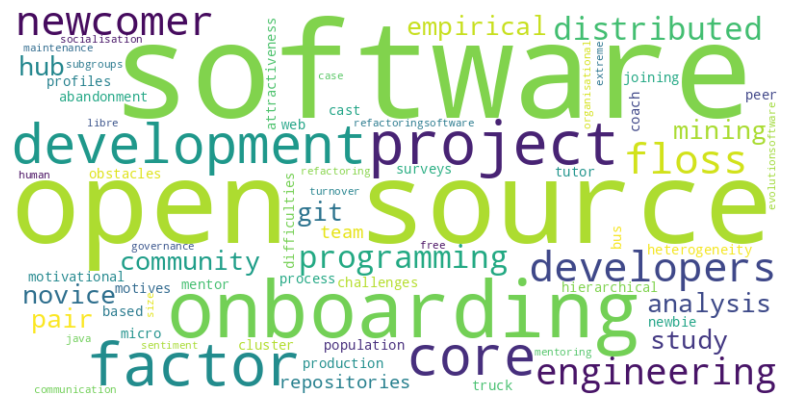

In [ ]:
dfKeywordReACTDriven = df.dropna(subset=['Keyword'])
KeywordReACTDriven = dfKeywordReACTDriven['Keyword']

all_text = ' '.join(KeywordReACTDriven)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

### Title Wordcloud - ReACT Driven
### Wordcloud generating from the Titles of the article, from which ReACT could be driven

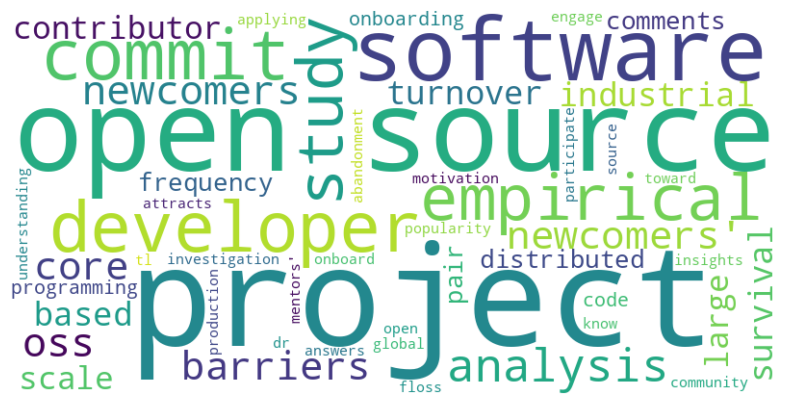

In [ ]:
dfTitleReACTDriven = df.dropna(subset=['Article'])
TitleReACTDriven = dfTitleReACTDriven['Article']

all_text = ' '.join(TitleReACTDriven)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words = 50).generate(all_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

### Keyword Wordcloud - NOT ReACT Driven

### Wordcloud generating from the keywords of articles, from which NO ReACT could be derived

In [ ]:
df = pd.read_excel("article.xlsx")
df['Keyword'] = df['Keyword'].str.lower()
df['Article'] = df['Article'].str.lower()
df = df[df['ReACTs'] == 'No ReACT could be derived from the article']

# dropping the rows that contains 'Article excluded' in the ReACT column

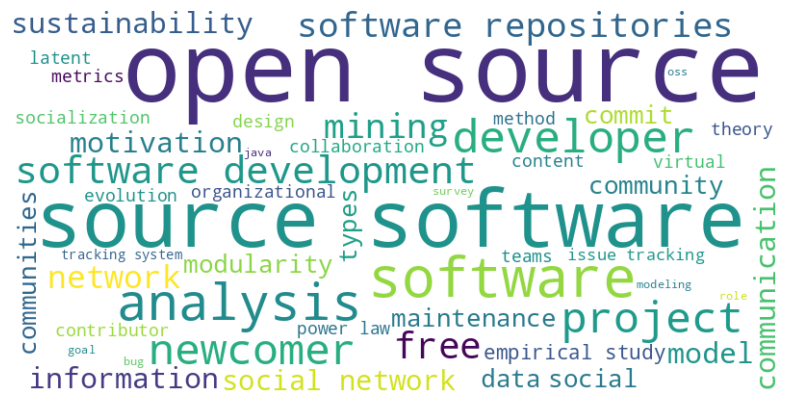

In [ ]:
dfKeywordNOTReACTDriven = df.dropna(subset=['Keyword'])
KeywordNOTReACTDriven = dfKeywordNOTReACTDriven['Keyword']

all_text = ' '.join(KeywordNOTReACTDriven)

all_text = all_text.replace(",", "")
all_text = re.sub(' +', ' ', all_text)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words = 50, repeat=False).generate(all_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

### Title Wordcloud - NOT ReACT Driven

### Wordcloud generating from the Title of articles, from which NO ReACT could be derived

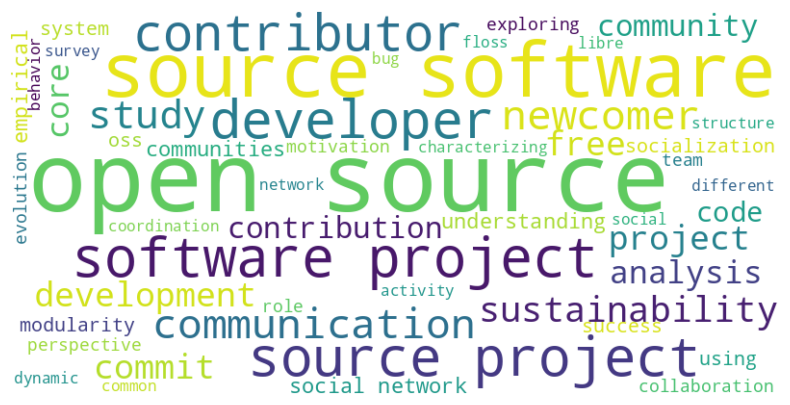

In [ ]:
dfTitleNOTReACTDriven = df.dropna(subset=['Article'])
TitleNOTReACTDriven = dfTitleNOTReACTDriven['Article']

all_text = ' '.join(TitleNOTReACTDriven)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words = 50).generate(all_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

### Venue (Conference) - NOT ReACT Driven


In [ ]:
df = pd.read_excel("article.xlsx")
df['Venue'] = df['Venue'].str.lstrip()
df['Venue'] = df['Venue'].str.rstrip()
df = df[df['Type'] == 'Conference']

unique_counts = df['Venue'].value_counts().reset_index()

unique_counts = unique_counts[unique_counts['index'] != 'Grey Literature']
unique_counts = unique_counts.head(10)
print(unique_counts)

import random
# Rename the columns for clarity
unique_counts.columns = ['Publication Venue', 'Count']

# Define an array of colors
darker_shades = ['darkred', 'lightblue', 'lightgreen', '#FFABAB', '#91a8a8',
                 '#95ab8a', '#00a86b', '#8E44AD', '#2E4053', '#D35400', '#a37b65',
                 '#6C5B7B', '#C0C999', '#7D8CC4', '#FFA07A', '#88D8B0',
    '#826c7F', '#D8D8D8', '#5F758E', '#E2B464', '#649E7D',
    '#CAAE77', '#7A9E9F', '#FAE5D3', '#BAC9FF', '#E47878',
    '#D2F2D2', '#7C83FD', '#F5A623', '#A77B7B', '#D8D8D8']
random.shuffle(darker_shades)

# Create an interactive bar plot using Plotly Express
fig = px.pie(unique_counts, names='Publication Venue', values='Count', color='Publication Venue', color_discrete_sequence=darker_shades)

# Save the plot as an HTML file
fig.write_html('PiePlot_Venues_C_All.html')
fig.show()

        index  Venue
0        ICSE     17
1  IFIP ICOSS      9
2         MSR      8
3        CSCW      4
4       HICSS      4
5         FSE      4
6        ESEM      3
7        ICSM      3
8  OPENCOLLAB      3
9        BSSE      2


### Venue (Journal) - NOT ReACT Driven




In [ ]:
df = pd.read_excel("article.xlsx")
df['Venue'] = df['Venue'].str.lstrip()
df['Venue'] = df['Venue'].str.rstrip()
df = df[df['Type'] == 'Journal']

unique_counts = df['Venue'].value_counts().reset_index()

unique_counts = unique_counts[unique_counts['index'] != 'Grey Literature']
unique_counts = unique_counts.head(10)
print(unique_counts)

import random
# Rename the columns for clarity
unique_counts.columns = ['Publication Venue', 'Count']

# Define an array of colors
darker_shades = ['darkred', 'lightblue', 'lightgreen', '#FFABAB', '#91a8a8',
                 '#95ab8a', '#00a86b', '#8E44AD', '#2E4053', '#D35400', '#a37b65',
                 '#6C5B7B', '#C0C999', '#7D8CC4', '#FFA07A', '#88D8B0',
    '#826c7F', '#D8D8D8', '#5F758E', '#E2B464', '#649E7D',
    '#CAAE77', '#7A9E9F', '#FAE5D3', '#BAC9FF', '#E47878',
    '#D2F2D2', '#7C83FD', '#F5A623', '#A77B7B', '#D8D8D8']
random.shuffle(darker_shades)

# Create an interactive bar plot using Plotly Express
fig = px.pie(unique_counts, names='Publication Venue', values='Count', color='Publication Venue', color_discrete_sequence=darker_shades)

# Save the plot as an HTML file
fig.write_html('PiePlot_Venues_J_All.html')
fig.show()

           index  Venue
0            IST      4
1            SEM      3
2            ISR      3
3            JSS      2
4            CHB      2
5  IEEE Software      2
6            ESE      2
7            AIS      2
8           TIMR      2
9            ORM      1


### Venue (Conference) - ReACT Driven


In [ ]:
df = pd.read_excel("article.xlsx")
df['Venue'] = df['Venue'].str.lstrip()
df['Venue'] = df['Venue'].str.rstrip()
df = df[df['ReACTs'] != 'No ReACT could be derived from the article']
df = df.dropna(subset=['ReACTs'])
df = df[~df['ReACTs'].str.contains('Article excluded')]
df = df[df['Type'] == 'Conference']

# dropping the rows that contains 'No ReACT...' value in the ReACT column
# dropping the rows that contains empty value in the ReACT column
# dropping the rows that contains 'Article excluded' in the ReACT column

unique_counts = df['Venue'].value_counts().reset_index()
unique_counts = unique_counts[unique_counts['index'] != 'Grey Literature']
unique_counts = unique_counts.head(10)
print(unique_counts)

import random
# Rename the columns for clarity
unique_counts.columns = ['Publication Venue', 'Count']

# Define an array of colors
darker_shades = ['darkred', 'lightblue', 'lightgreen', '#FFABAB', '#91a8a8',
                 '#95ab8a', '#00a86b', '#8E44AD', '#2E4053', '#D35400', '#a37b65',
                 '#6C5B7B', '#C0C999', '#7D8CC4', '#FFA07A', '#88D8B0',
    '#826c7F', '#D8D8D8', '#5F758E', '#E2B464', '#649E7D',
    '#CAAE77', '#7A9E9F', '#FAE5D3', '#BAC9FF', '#E47878',
    '#D2F2D2', '#7C83FD', '#F5A623', '#A77B7B', '#D8D8D8']
random.shuffle(darker_shades)

# Create an interactive bar plot using Plotly Express
fig = px.pie(unique_counts, names='Publication Venue', values='Count', color='Publication Venue', color_discrete_sequence=darker_shades)

# Save the plot as an HTML file
fig.write_html('PiePlot_Venues_C_ReACTDriven.html')
fig.show()

          index  Venue
0          ESEM      2
1          ICSE      2
2          SBES      2
3    IFIP ICOSS      1
4          CSCW      1
5          ICSE      1
6         ICGSE      1
7  IFIP ICOSS\n      1
8       WikiSym      1
9           MSR      1


### Venue (Journal) - ReACT Driven


In [ ]:
df = pd.read_excel("article.xlsx")
df['Venue'] = df['Venue'].str.lstrip()
df['Venue'] = df['Venue'].str.rstrip()
df = df[df['ReACTs'] != 'No ReACT could be derived from the article']
df = df.dropna(subset=['ReACTs'])
df = df[~df['ReACTs'].str.contains('Article excluded')]
df = df[df['Type'] == 'Journal']

# dropping the rows that contains 'No ReACT...' value in the ReACT column
# dropping the rows that contains empty value in the ReACT column
# dropping the rows that contains 'Article excluded' in the ReACT column

unique_counts = df['Venue'].value_counts().reset_index()
unique_counts = unique_counts[unique_counts['index'] != 'Grey Literature']
unique_counts = unique_counts.head(10)
print(unique_counts)

import random
# Rename the columns for clarity
unique_counts.columns = ['Publication Venue', 'Count']

# Define an array of colors
darker_shades = ['darkred', 'lightblue', 'lightgreen', '#FFABAB', '#91a8a8',
                 '#95ab8a', '#00a86b', '#8E44AD', '#2E4053', '#D35400', '#a37b65',
                 '#6C5B7B', '#C0C999', '#7D8CC4', '#FFA07A', '#88D8B0',
    '#826c7F', '#D8D8D8', '#5F758E', '#E2B464', '#649E7D',
    '#CAAE77', '#7A9E9F', '#FAE5D3', '#BAC9FF', '#E47878',
    '#D2F2D2', '#7C83FD', '#F5A623', '#A77B7B', '#D8D8D8']
random.shuffle(darker_shades)

# Create an interactive bar plot using Plotly Express
fig = px.pie(unique_counts, names='Publication Venue', values='Count', color='Publication Venue', color_discrete_sequence=darker_shades)

# Save the plot as an HTML file
fig.write_html('PiePlot_Venues_J_ReACTDriven.html')
fig.show()

      index  Venue
0       IEP      1
1       SCP      1
2     IJERT      1
3       IST      1
4  PLOS ONE      1
5       SEM      1
6        CB      1


###Years - All Analyzed

In [ ]:
df = pd.read_excel("article.xlsx")
unique_counts = df['Publication Year'].value_counts().reset_index()

unique_counts.columns = ['year', 'year_count']
unique_counts

# Define the bins for grouping the years
bins = [2001, 2006, 2011, 2016, 2021, 2024]

# Define labels for the groups
labels = ['2001-2005', '2006-2010', '2011-2015', '2016-2020', '2021-2023']

# Create a new column 'year_group' by binning the 'year' column
unique_counts['year_group'] = pd.cut(unique_counts['year'], bins=bins, labels=labels, right=False)

# Group by 'year_group' and sum the 'year_count' for each group
unique_counts = unique_counts.groupby('year_group')['year_count'].sum().reset_index()

# Display the result
print(unique_counts)
unique_counts['year_group']
# Define an array of colors
darker_shades = ['darkred', 'lightblue', 'lightgreen', '#FFABAB', '#91a8a8', '#95ab8a', '#00a86b', '#8E44AD', '#2E4053', '#D35400', '#a37b65', '#548569', '#474466', '#FDEBD0', '#F9EBB2', '#EAECEE', '#8B5A80']
# random.shuffle(darker_shades)

fig = px.bar(unique_counts, x='year_group', y='year_count', color='year_group', color_discrete_sequence=darker_shades)

# Save the plot as an HTML file
fig.write_html('BarPlot_YearAll.html')
fig.show()

  year_group  year_count
0  2001-2005           7
1  2006-2010          38
2  2011-2015          52
3  2016-2020          47
4  2021-2023          24


###Years - ReACT Driven

In [ ]:
df = pd.read_excel("article.xlsx")
df = df[df['ReACTs'] != 'No ReACT could be derived from the article']
df = df.dropna(subset=['ReACTs'])
df = df[~df['ReACTs'].str.contains('Article excluded')]

unique_counts = df['Publication Year'].value_counts().reset_index()

unique_counts.columns = ['year', 'year_count']
unique_counts

# Define the bins for grouping the years
bins = [2001, 2006, 2011, 2016, 2021, 2024]

# Define labels for the groups
labels = ['2001-2005', '2006-2010', '2011-2015', '2016-2020', '2021-2023']

# Create a new column 'year_group' by binning the 'year' column
unique_counts['year_group'] = pd.cut(unique_counts['year'], bins=bins, labels=labels, right=False)

# Group by 'year_group' and sum the 'year_count' for each group
unique_counts = unique_counts.groupby('year_group')['year_count'].sum().reset_index()

# Display the result
print(unique_counts)

unique_counts['year_group']

# Define an array of colors
darker_shades = ['darkred', 'lightblue', 'lightgreen', '#FFABAB', '#91a8a8', '#95ab8a', '#00a86b', '#8E44AD', '#2E4053', '#D35400', '#a37b65', '#548569', '#474466', '#FDEBD0', '#F9EBB2', '#EAECEE', '#8B5A80']
# random.shuffle(darker_shades)

fig = px.bar(unique_counts, x='year_group', y='year_count', color='year_group', color_discrete_sequence=darker_shades)

# Save the plot as an HTML file
fig.write_html('BarPlot_YearReACTDriven.html')
fig.show()

### Distribution of Articles - with respect to publication types
####  All articles

In [ ]:
df = pd.read_excel("article.xlsx")
df = df.dropna(subset=['Type'])

unique_counts = df['Type'].value_counts().reset_index()

# Rename the columns for clarity
unique_counts.columns = ['Publication Type', 'Count']

# Define an array of colors
darker_shades = ['darkred', 'lightblue', 'lightgreen', '#FFABAB', '#91a8a8',
                 '#95ab8a', '#00a86b', '#8E44AD', '#2E4053', '#D35400', '#a37b65',
                 '#6C5B7B', '#C0C999', '#7D8CC4', '#FFA07A', '#88D8B0',
    '#826c7F', '#D8D8D8', '#5F758E', '#E2B464', '#649E7D',
    '#CAAE77', '#7A9E9F', '#FAE5D3', '#BAC9FF', '#E47878',
    '#D2F2D2', '#7C83FD', '#F5A623', '#A77B7B', '#D8D8D8']

random.shuffle(darker_shades)

# Create an interactive bar plot using Plotly Express
fig = px.bar(unique_counts, x='Count', y='Publication Type', color='Publication Type', color_discrete_sequence=darker_shades, orientation='h')

# Save the plot as an HTML file
fig.write_html('BarPlot_PublicationTypeAll.html')
fig.show()

### Distribution of Articles - with respect to publication types
####  ReACT Driven articles

In [ ]:
df = pd.read_excel("article.xlsx")
df = df[df['ReACTs'] != 'No ReACT could be derived from the article']
df = df.dropna(subset=['ReACTs'])
df = df[~df['ReACTs'].str.contains('Article excluded')]


df = df.dropna(subset=['Type'])

unique_counts = df['Type'].value_counts().reset_index()

# Rename the columns for clarity
unique_counts.columns = ['Publication Type', 'Count']

# Define an array of colors
darker_shades = ['darkred', 'lightblue', 'lightgreen', '#FFABAB', '#91a8a8',
                 '#95ab8a', '#00a86b', '#8E44AD', '#2E4053', '#D35400', '#a37b65',
                 '#6C5B7B', '#C0C999', '#7D8CC4', '#FFA07A', '#88D8B0',
    '#826c7F', '#D8D8D8', '#5F758E', '#E2B464', '#649E7D',
    '#CAAE77', '#7A9E9F', '#FAE5D3', '#BAC9FF', '#E47878',
    '#D2F2D2', '#7C83FD', '#F5A623', '#A77B7B', '#D8D8D8']

random.shuffle(darker_shades)

# Create an interactive bar plot using Plotly Express
fig = px.bar(unique_counts, x='Count', y='Publication Type', color='Publication Type', color_discrete_sequence=darker_shades, orientation='h')

# Save the plot as an HTML file
fig.write_html('BarPlot_PublicationTypeReACTDriven.html')
fig.show()